### Análise Exploratória de Dados - Goodreads
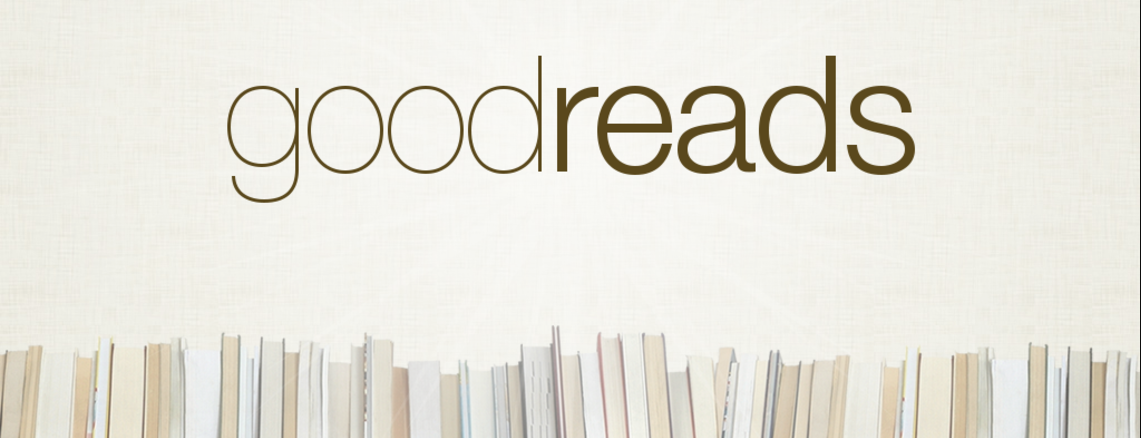

#### Índice:
- Sumário

- Análise Exploratória

- Tecnologias usadas

- Autores da análise

- Agradecimentos

#### Sumário:

1.Introdução

1.1 Objetivos

1.2 Palavras-chave

2. Metodologia

2.1 Importação da base de dados

2.2 Verificação das informações

3. Análise e conclusão dos dados apresentados

3.1 Top 10 livros com maior número de ocorrências

3.2 Línguagem mais utilizada

3.3 Top 10 livros mais avaliados

3.4 Top 10 autores com o maior número de leitores

3.5 Autores mais bem avaliados


#### 1. Introdução 
Para esta análise exploratória iremos analisar a platafororma Goodreads e quais autores, livros e linguagens fornecidos no site são de maior ocorrência e interesse de seus usuários.
Goodreads é uma plataforma online dedicada a livros, leitores e comunidades de literatura. Fundada em 2006, a plataforma permite que os usuários descubram, avaliem, revisem e discutam livros. É uma das maiores comunidades de leitores do mundo, com milhões de membros.


1.1 Objetivos

O objetivo desse estudo é realizar uma Análise Exploratória dos Dados (Exploratory Data Analysis - EDA) do conjunto de dados fornecidos por um usuário do Kaggle (https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks). Que foi a base para responder as seguintes questões:

1 - Qual o top 10 livros com maior número de ocorrências?

2 - Qual a línguagem mais utilizada entre estes livros ?

3 - Qual o top 10 dos livros mais avaliados ?

4 - Qual o top 10 dos autores com a maior quantidade de leitores em seus livros ?

5 - Quais os autores mais bem avaliados ?

1.2  Palavras chave:

- bookID - Identificação de cada livro para o Goodreads
- title - Título do Livro
- authors - Escritor do livro 
- average_rating - Média da nota dada pelos leitores 
- ISBN ISBN(10) - identificação única de cada livro, traz dados como edição e editora
- ISBN 13 - novo formato de ISBN
- language_code - língua original do livro
- Num_pages - Número de páginas do livro
- Ratings_count - Número de notas dada para o livro
- text_reviews_count - Número de resenhas dadas pelos leitores

#### 2. Metodologia 

Neste tópico é realizado o processo de preparação e organização dos dados a partir da importação de dados das bibliotecas.

In [284]:
import numpy as np 
import pandas as pd
import os
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm
import re
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [285]:
import warnings
warnings.filterwarnings("ignore")

2.1 importação de base

In [286]:
caminho_base = pathlib.Path('Goodreads')

base_gd = pd.read_csv('books.csv', error_bad_lines = False)

display(base_gd)


b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [287]:
base_gd.index = base_gd['bookID']

2.2 Verificação das principais informações da base, como os tipos de cada variável e número de nulos.

In [288]:
base_gd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 45641
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.1+ MB


Correção dos Labels da autora J.K Rowling e unificação da informação.

In [289]:
base_gd.replace(to_replace='J.K. Rowling-Mary GrandPré', value = 'J.K. Rowling', inplace=True)

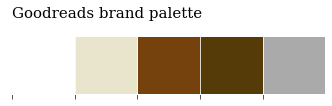

In [290]:
# Palette
sns.palplot(['#ffffff', '#e9e5cd', '#75420e','#553b08', '#aaaaaa'])

plt.title("Goodreads brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

Verficação da correlação entre o peso e as variáveis.

<AxesSubplot:>

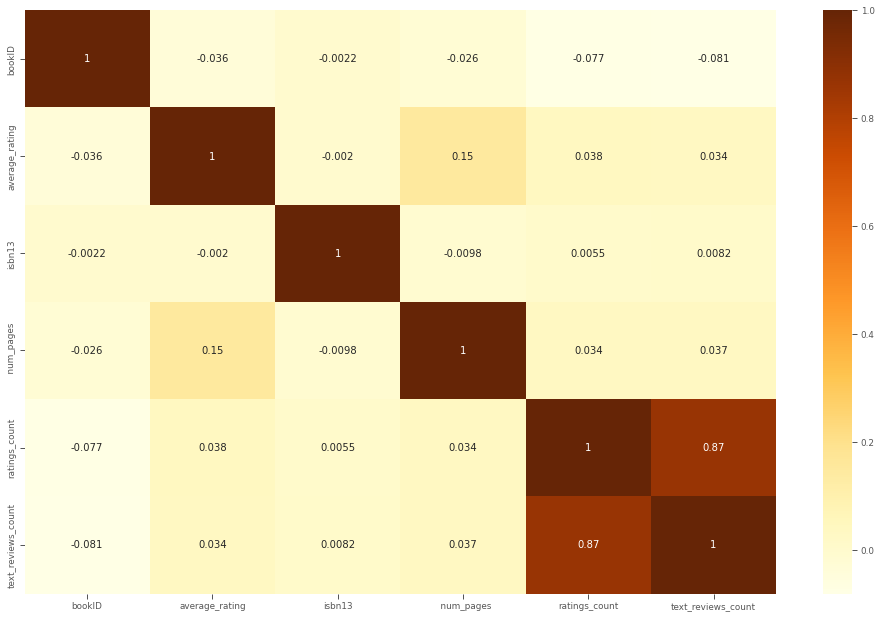

In [291]:
plt.figure(figsize=(15, 10))
sns.heatmap(base_gd.corr(), annot=True, cmap='YlOrBr')
#print(base_airbnb.corr())

Podemos observar que quanto mais próximo de 1 ou -1, mais correlacionadas são as variáveis, neste caso, as variáveis "text_reviews_count" e "ratings_count" possuem as maiores correlações, com cerca de 87%, o que indica que uma variável influencia a outra.


#### 3. Análise e conclusão dos dados apresentados.


3.1 Ranking dos top 10 livros com maior número de ocorrências:

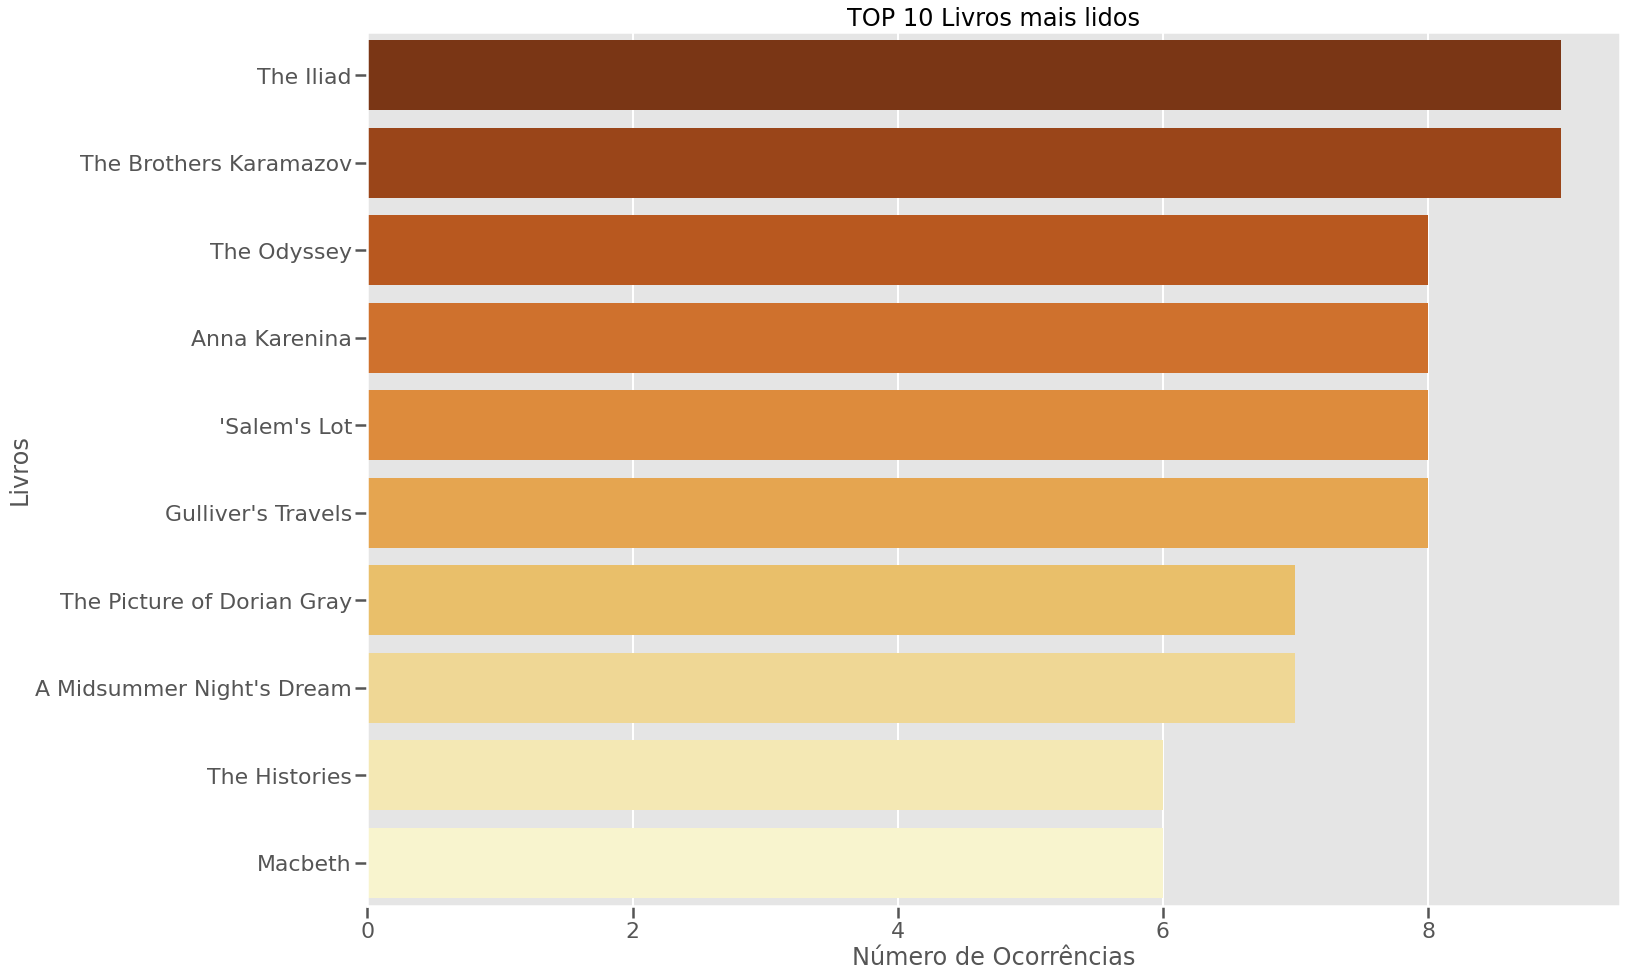

In [292]:
sns.set_context('poster')
plt.figure(figsize=(20,15))
books = base_gd['title'].value_counts()[:10]
rating = base_gd.average_rating[:10]
sns.barplot(x = books, y = books.index, palette='YlOrBr_r')
plt.title("TOP 10 Livros mais lidos")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Livros")
plt.show()

Observação: O top 10 livros com maior número de ocorrências são considerados como livros clássicos pelos usuários.

3.2 Verificação das línguas que mais recorrentes na base de dados:

In [293]:
print(base_gd['language_code'].value_counts())

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64


3.2 Análise de qual a língua mais utilizada nos livros:

['eng', 'en-US', 'en-GB', 'en-CA']


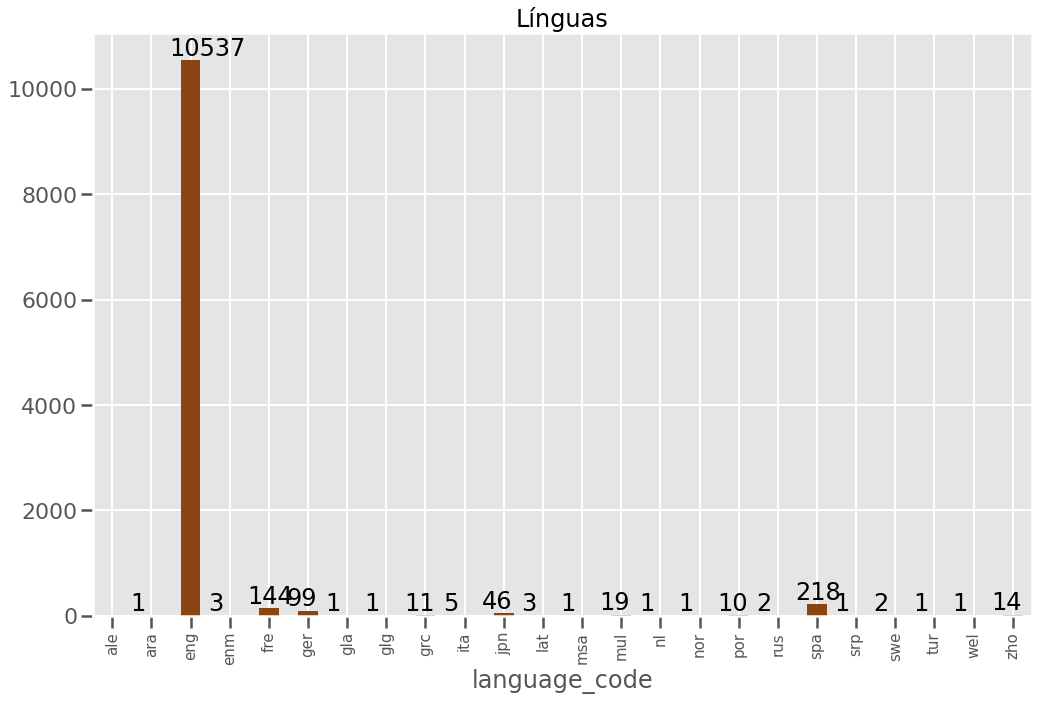

In [294]:
tabela_tipo_language = base_gd['language_code'].value_counts()
colunas_agrupar = []
english = ['en-US', 'eng', 'en-GB', 'en-CA']


for tipo in tabela_tipo_language.index:
    if tipo in english:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base_gd.loc[base_gd['language_code']==tipo, 'language_code'] = 'eng'
    

plt.figure(figsize=(15,10))
ax = base_gd.groupby('language_code')['title'].count().plot.bar(color='saddlebrown')
plt.title('Línguas')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))


3.3 Top 10 livros com maior número de avaliações:

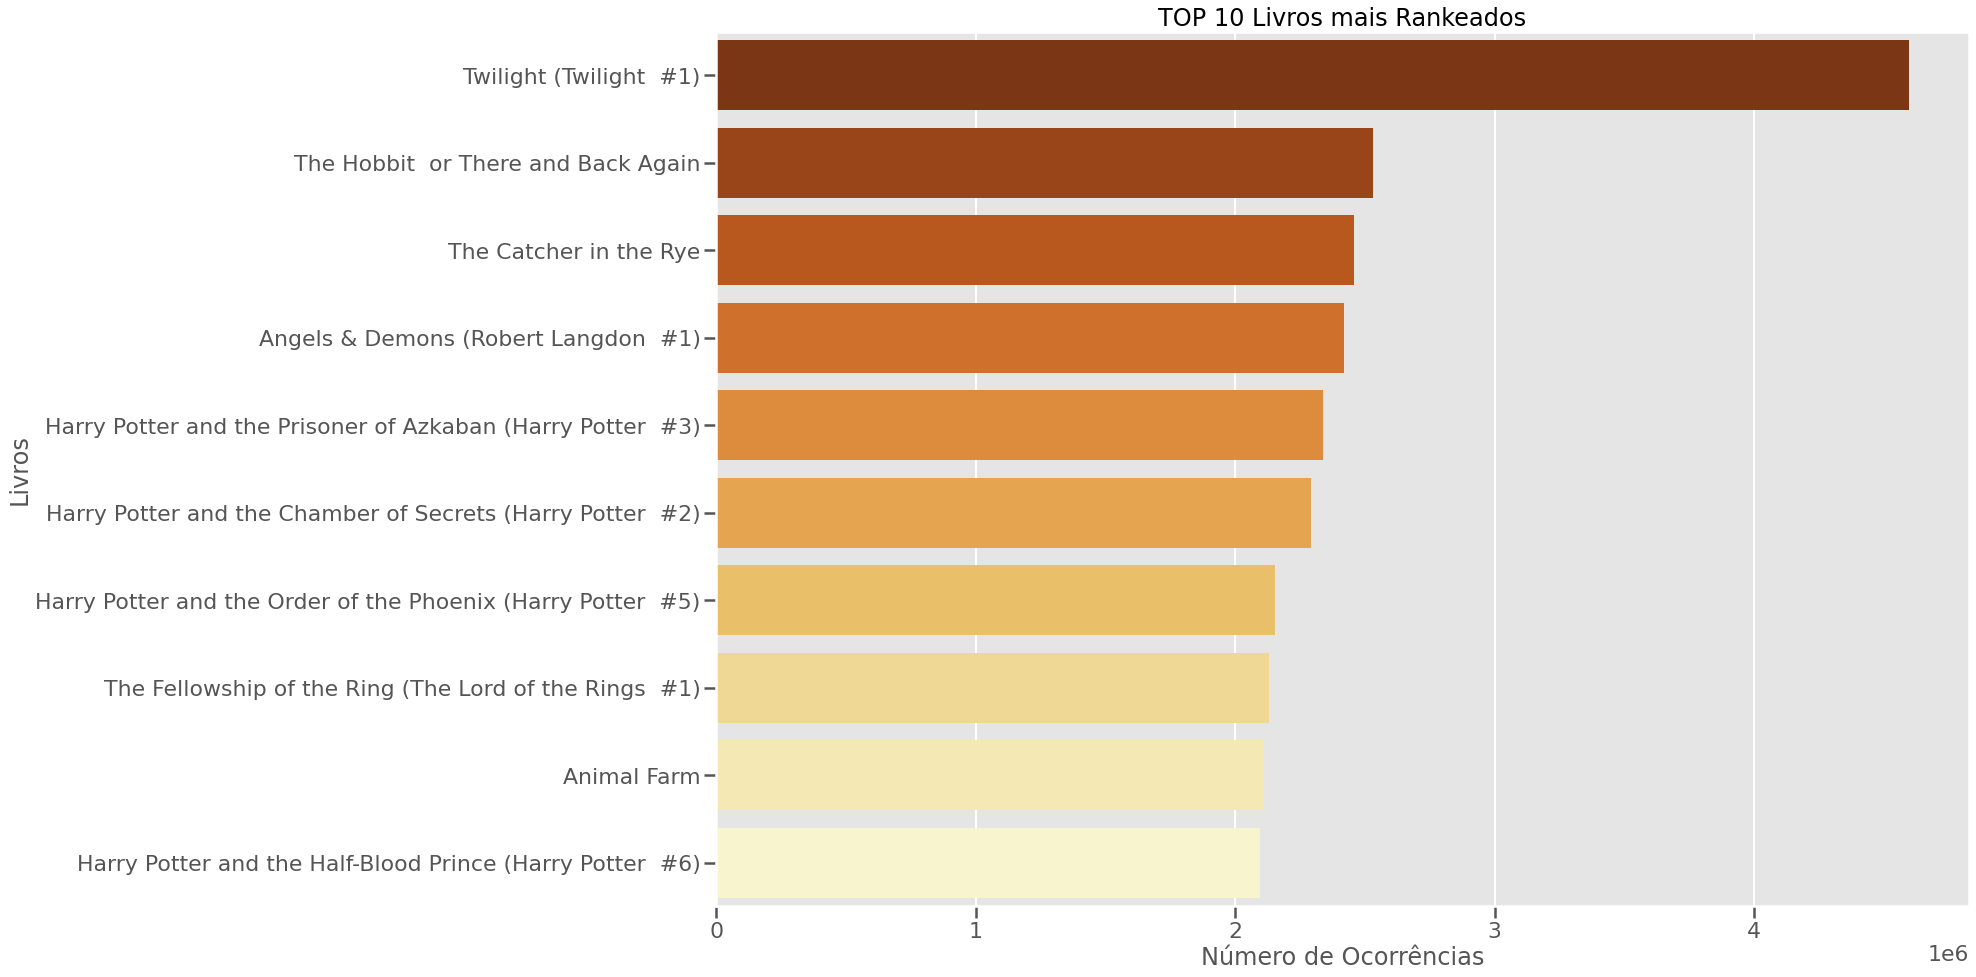

In [295]:
most_rated = base_gd.sort_values('ratings_count', ascending = False).head(10).set_index('title')
sns.set_context('poster')
plt.figure(figsize=(20,15))
books = base_gd['title'].value_counts()[:10]
rating = base_gd.ratings_count[:10]
sns.barplot(x = most_rated['ratings_count'], y = most_rated.index, palette='YlOrBr_r')
plt.title("TOP 10 Livros mais Rankeados")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Livros")
plt.show()

3.4 Top 10 autores com maior número de livros lidos:

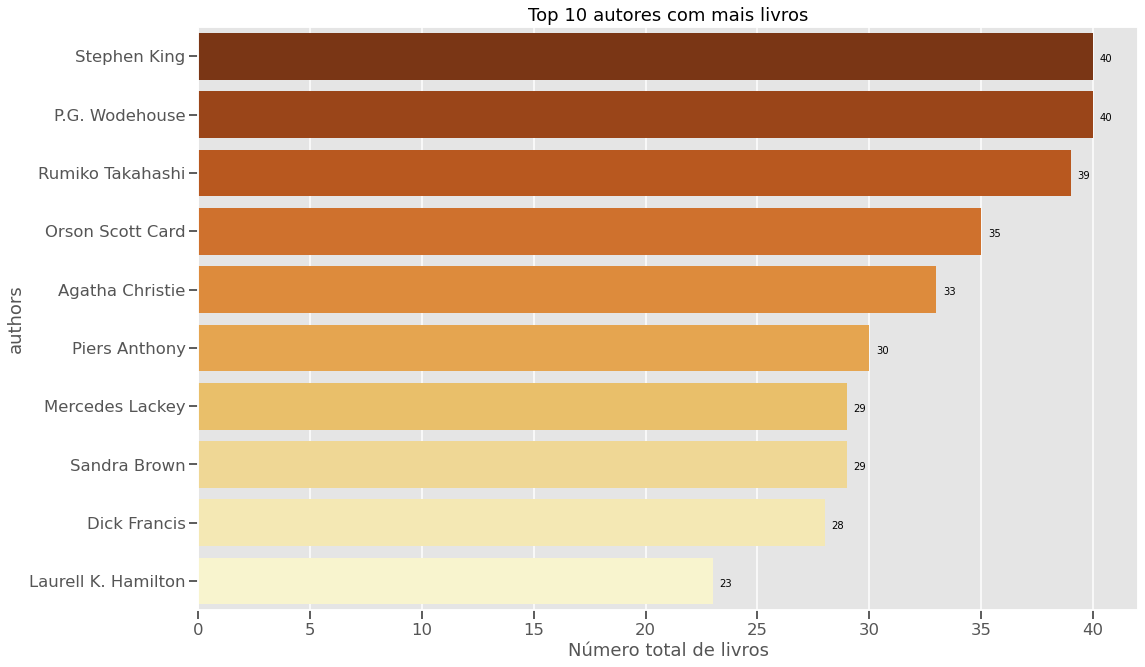

In [296]:
sns.set_context('talk')
most_books = base_gd.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='YlOrBr_r')
ax.set_title("Top 10 autores com mais livros")
ax.set_xlabel("Número total de livros")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

3.5 Top 10 autores mais bem avaliados:

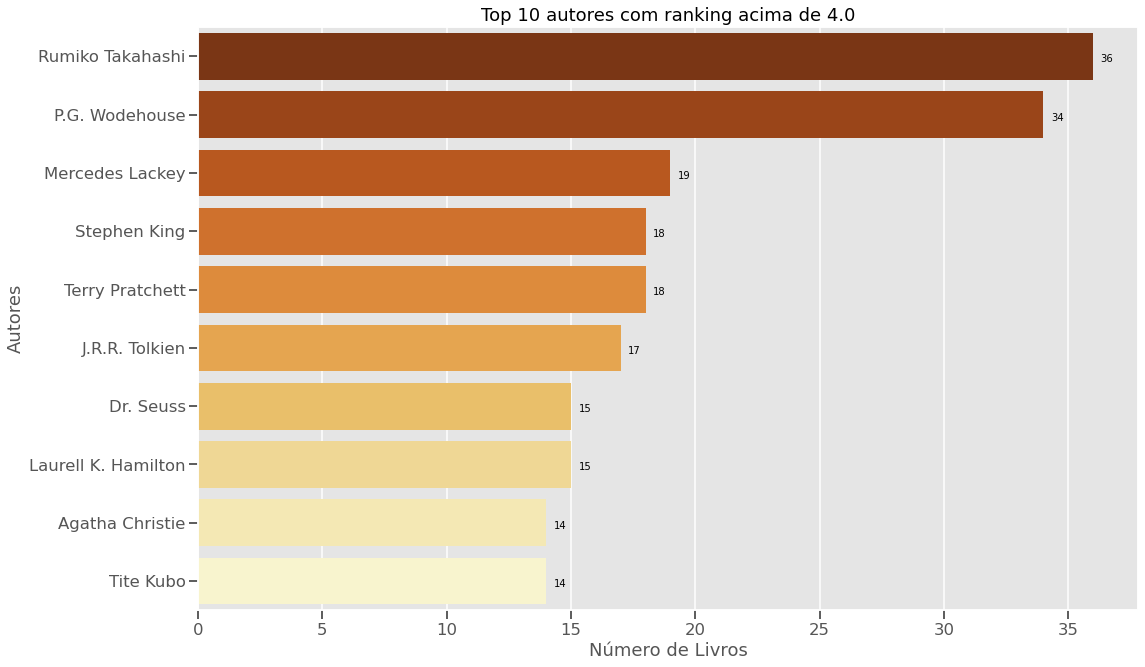

In [297]:
high_rated_author = base_gd[base_gd['average_rating']>=4.0]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette='YlOrBr_r')
ax.set_xlabel("Número de Livros")
ax.set_ylabel("Autores")
ax.set_title("Top 10 autores com ranking acima de 4.0")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

Média de nota geral:

<AxesSubplot:xlabel='average_rating', ylabel='Density'>

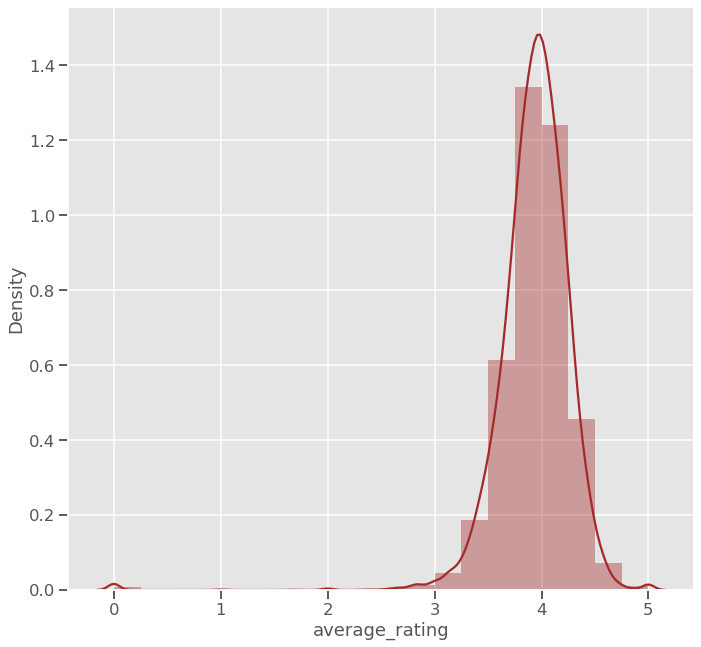

In [298]:
plt.figure(figsize=(10,10))
rating= base_gd.average_rating.astype(float)
sns.distplot(rating, bins=20, color='brown')

Observação: É possível observar que a classificação geral fica em torno da média 4, e média 5 é mais difícil de ser alcançada.

Agrupamento das notas em cinco grupos para o entendimento da distribuição geral de notas:

In [299]:
condicoes = [(base_gd['average_rating']>=4), 
             (base_gd['average_rating']>=3), 
             (base_gd['average_rating']>=2),
             (base_gd['average_rating']>=1),
             (base_gd['average_rating']>=0)]
opcoes = ["Entre 4 and 5", "Entre 3 and 4", "Entre 2 and 3", "Entre 1 and 2", "Entre 0 and 1"]
base_gd['rating_group'] = np.select(condicoes, opcoes, default="Null")


print(base_gd['rating_group'].value_counts())


Entre 3 and 4    6085
Entre 4 and 5    4954
Entre 2 and 3      56
Entre 0 and 1      25
Entre 1 and 2       3
Name: rating_group, dtype: int64


In [300]:
ratings_pie = base_gd['rating_group'].value_counts().reset_index()
labels = ratings_pie['index']

In [301]:
ratings_pie = base_gd['rating_group'].value_counts().reset_index()
labels = ratings_pie['index']

print(ratings_pie)

           index  rating_group
0  Entre 3 and 4          6085
1  Entre 4 and 5          4954
2  Entre 2 and 3            56
3  Entre 0 and 1            25
4  Entre 1 and 2             3


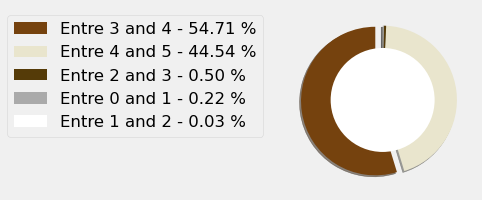

In [302]:
ratings_pie = base_gd['rating_group'].value_counts().reset_index()
labels = ratings_pie['index']
colors = ['#75420e','#e9e5cd','#553b08', '#aaaaaa', '#ffffff']
explode = [0.1, 0.0, 0.0, 0.0, 0.0]

plt.style.use('fivethirtyeight')

plt.pie(ratings_pie['rating_group'], explode=explode, shadow=True,  startangle=90, colors=colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(labels, percent)]
plt.legend( labels, loc = 'best',bbox_to_anchor=(-0.1, 1.),)

plt.tight_layout()

plt.show()

Concluímos que a concentração da média de notas se destacou principalmente para o grupo "Entre 3 e 4", com quase 55%, seguida do grupo "Entre 4 e 5", com 44%

Avaliando se há um relacionamento entre a média de notas e o número de resenhas:

<Figure size 1080x720 with 0 Axes>

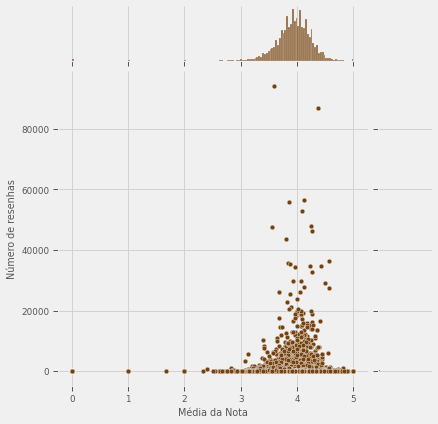

In [303]:
plt.figure(figsize=(15,10))
base_gd.dropna(0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x="average_rating",y='text_reviews_count', 
                  kind='scatter',  data=base_gd[['text_reviews_count', 'average_rating']], color='#75420e')
ax.set_axis_labels("Média da Nota", "Número de resenhas")
plt.show()

O número de resenhas se concentra principalmente em torno de 5.000, enquanto que a média da nota fica em torno de 3 e 4

Avaliando se há um relacionamento entre a média de nota e número de páginas

<Figure size 1080x720 with 0 Axes>

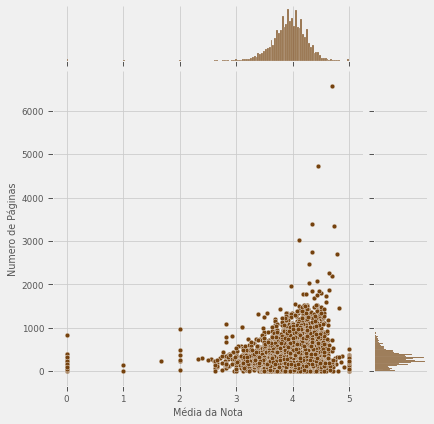

In [304]:
plt.figure(figsize=(15,10))
base_gd.dropna(0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x="average_rating",y='  num_pages', 
                  kind='scatter',  data=base_gd[['  num_pages', 'average_rating']], color='#75420e')
ax.set_axis_labels("Média da Nota", "Numero de Páginas")
plt.show()

Filtrando a visualização abaixo de 1000 páginas:

<Figure size 1080x720 with 0 Axes>

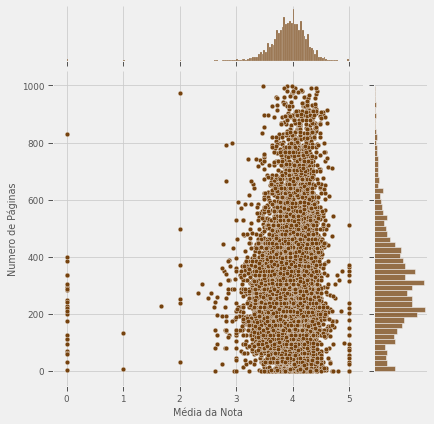

In [ ]:
base_pages_filter = base_gd[~(base_gd['  num_pages']>1000)]

plt.figure(figsize=(15,10))
base_pages_filter.dropna(0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x="average_rating",y='  num_pages', 
                  kind='scatter',  data=base_pages_filter[['  num_pages', 'average_rating']], color='#75420e')
ax.set_axis_labels("Média da Nota", "Numero de Páginas")
plt.show()

Observação: é possível observar que os livros com número de páginas entre 200-300 são os que mais possuem notas altas.

#### Tecnologias usadas
- Phyton
- Jupyter Notebook
- Markdown
- Kaggle

#### Autores da análise 
- Julia Santos Silva RA: 125111351368
- Caio Ferraz Martins dos Santos RA: 125111363268

#### Agradecimentos 

A todos aqueles que contribuiram, de alguma forma, indireta ou indiretamente para a realização deste trabalho, agradecimentos especiais aos professores; Edquel farias e Diego barros que nos auxiliaram e enriqueceram nosso processo de aprendizado.